<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [10]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv("DMV_Written_Tests.csv")
df.head()


Saving DMV_Written_Tests.csv to DMV_Written_Tests (2).csv


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [12]:
df.shape

(100, 3)

In [16]:
df.size

300

In [17]:
df.describe

<bound method NDFrame.describe of     DMV_Test_1  DMV_Test_2  Results
0    34.623660   78.024693        0
1    30.286711   43.894998        0
2    35.847409   72.902198        0
3    60.182599   86.308552        1
4    79.032736   75.344376        1
..         ...         ...      ...
95   83.489163   48.380286        1
96   42.261701   87.103851        1
97   99.315009   68.775409        1
98   55.340018   64.931938        1
99   74.775893   89.529813        1

[100 rows x 3 columns]>

In [19]:
from sklearn.model_selection import train_test_split
X = df[['DMV_Test_1', 'DMV_Test_2']]
y = df['Results']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80, 2)
X_test shape: (20, 2)
y_train shape: (80,)
y_test shape: (20,)


### Task 3: Visualize the Data
---

/tmp/ipython-input-3173457576.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Results",data=df,palette="Set1")


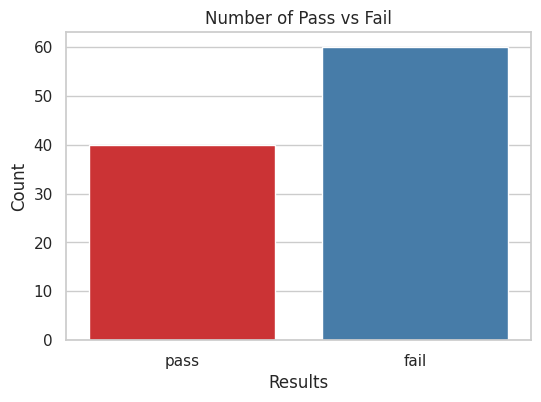

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x="Results",data=df,palette="Set1")
plt.title("Number of Pass vs Fail")
plt.xticks([0,1],["pass","fail"])
plt.ylabel("Count")
plt.show()

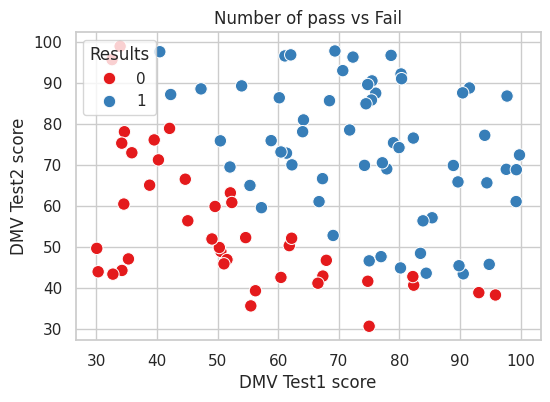

In [38]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="DMV_Test_1",y="DMV_Test_2",hue="Results",data=df,palette="Set1",s=80)
plt.title("Number of pass vs Fail")
plt.xlabel("DMV Test1 score")
plt.ylabel("DMV Test2 score")
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [42]:
def sigmoid(z):
  return 1/1+np.exp(-z)

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [53]:
def sigmoid(z):
  return 1/1+np.exp(-z)

def compute_cost(theta,X,y):
  m=len(y)
  h=sigmoid(X @ theta)
  cost=(-1/m)*(y.T @ nplog(h)+(1-y.T)@np.log(1-h))
  return cost

def compute_gradient(theta,x,y):
  m=len(y)
  h=sigmoid(X @ theta)
  gradient=(1/m)*(X.T@(h-y))
  return gradient

### Task 6: Cost and Gradient at Initialization
---

### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$